In [1]:
import socket
import datetime
print ("My Laptop is : ",  socket.gethostname()    )
print ("Current Time : ",  datetime.datetime.now() )
print ("Temitope Adenuga")

My Laptop is :  MacBook-Pro.attlocal.net
Current Time :  2023-07-24 12:27:01.808219
Temitope Adenuga


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Loading the data
df = pd.read_csv("complaints.csv")
df.head()

/var/folders/c4/1cgj0pf52z52dqrl3n6sm6x80000gn/T/ipykernel_3019/2515790476.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30308.0,NaN,Other,Web,2023-04-27,In progress,Yes,NaN,6896105
1,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19145.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896026
2,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,19111.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896030
3,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,78725.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896035
4,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,11233.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896060


In [4]:
df.dropna(axis = 0, how ='any')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
59211,2017-04-04,Debt collection,Medical,Communication tactics,Threatened to take legal action,Called my work number. When I told them that t...,Company believes it acted appropriately as aut...,TH Professional & Medical Collections LTD,IL,61525.0,Servicemember,Consent provided,Web,2017-04-04,Closed with explanation,Yes,Yes,2418240
60428,2015-12-29,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,I worked in XXXX from XX/XX/XXXX until XX/XX/X...,Company believes it acted appropriately as aut...,CL Holdings LLC,OH,44060.0,Older American,Consent provided,Web,2015-12-29,Closed with non-monetary relief,Yes,No,1718391
62682,2015-03-31,Debt collection,"Other (i.e. phone, health club, etc.)",Taking/threatening an illegal action,Sued w/o proper notification of suit,"I was XXXX in XXXX 2009. At that time, I was r...",Company disputes the facts presented in the co...,Linebarger Goggan Blair & Sampson LLP,OH,45039.0,Servicemember,Consent provided,Web,2015-03-31,Closed,Yes,No,1308945
63582,2015-11-19,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I purchased membership tickets online. When I ...,Company believes complaint caused principally ...,"Aargon Agency, Inc.",LA,71291.0,Servicemember,Consent provided,Web,2015-11-19,Closed,No,No,1663704
63652,2015-07-14,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,Penn credit at XXXX is calling my parents and ...,Company believes it acted appropriately as aut...,Penn Credit Corporation,DC,20002.0,Servicemember,Consent provided,Web,2015-07-14,Closed with explanation,Yes,No,1467842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583798,2016-05-28,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,I am a new XXXX who moved to XXXX on XXXX XXXX...,Company disputes the facts presented in the co...,Renton Collections Inc.,WA,98121.0,Servicemember,Consent provided,Web,2016-05-28,Closed with explanation,Yes,Yes,1946158
3583799,2016-11-30,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,When we left XXXX XXXX XXXX XXXX XXXX we vacat...,Company believes the complaint is the result o...,"HW Holding, Inc",AR,72770.0,Servicemember,Consent provided,Web,2016-11-30,Closed with non-monetary relief,Yes,No,2226551
3583928,2015-07-27,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,I was not supposed to billed for any of these ...,Company believes it acted appropriately as aut...,"HCFS Health Care Financial Services, Inc.",FL,33141.0,Servicemember,Consent provided,Web,2015-08-10,Closed with explanation,Yes,No,1489002
3583996,2015-11-18,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,called left message even though I answered. St...,Company can't verify or dispute the facts in t...,Focus Holding Company,IL,60013.0,"Older American, Servicemember",Consent provided,Web,2015-12-11,Closed with explanation,Yes,No,1660543


In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30308.0,NaN,Other,Web,2023-04-27,In progress,Yes,NaN,6896105
1,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19145.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896026
2,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,19111.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896030
3,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,78725.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896035
4,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,11233.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896060


In [6]:
df.shape

(3585952, 18)

The goal of this project is to have a better understanding of consumer complaints. AAnalyzing patterns and identify insights that would help increase consumer satisfaction.

EXPLORATORY DATA ANALYSIS

In [7]:
# Company response to consumer 
df['Company response to consumer'].value_counts()

Company response to consumer
Closed with explanation            2675819
Closed with non-monetary relief     602986
Closed with monetary relief         131403
In progress                         125555
Closed without relief                17868
Closed                               17611
Untimely response                     9402
Closed with relief                    5304
Name: count, dtype: int64

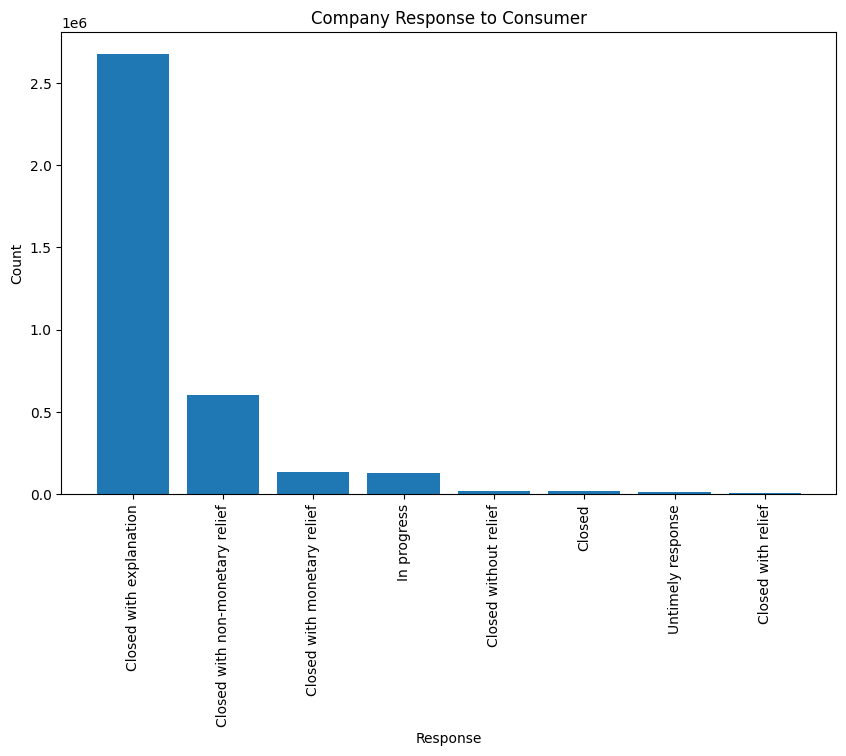

In [8]:
#Visualize the distribution of the responcse to consumer 
# Calculate value counts
value_counts = df['Company response to consumer'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)

# Set plot title and labels
plt.title("Company Response to Consumer")
plt.xlabel("Response")
plt.ylabel("Count")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [9]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3585947,2016-07-12,Bank account or service,Checking account,"Account opening, closing, or management",NaN,"Hello, I opened a CitiGold checking account wi...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11211.0,NaN,Consent provided,Web,2016-07-12,Closed with monetary relief,Yes,No,2009169
3585948,2017-02-19,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,I am unable to access my credit report online ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,GA,30047.0,NaN,Consent provided,Web,2017-02-19,Closed with explanation,Yes,Yes,2351504
3585949,2017-04-26,Mortgage,FHA mortgage,Trouble during payment process,NaN,NaN,NaN,Selene Finance LP,NC,27379.0,NaN,Consent not provided,Web,2017-04-26,Closed with explanation,Yes,NaN,2467475
3585950,2017-02-07,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,44820.0,NaN,Consent not provided,Web,2017-02-07,Closed with explanation,Yes,No,2333389
3585951,2018-03-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,10462.0,NaN,NaN,Fax,2018-03-19,Closed with explanation,Yes,NaN,2846995


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585952 entries, 0 to 3585951
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 492.

In [11]:
df.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
2,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
3,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
4,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585947,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
3585948,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3585949,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,True,False
3585950,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False


In [12]:
df.shape

(3585952, 18)

<Axes: title={'center': 'Company Response'}, ylabel='Company response to consumer'>

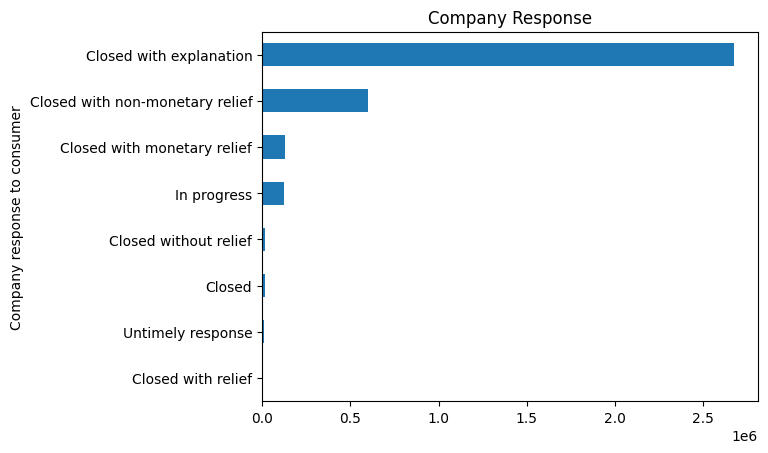

In [13]:
# Understanding the Distribution of Company Response 
df['Company response to consumer'].value_counts().sort_values(ascending=True).plot.barh(title='Company Response') 

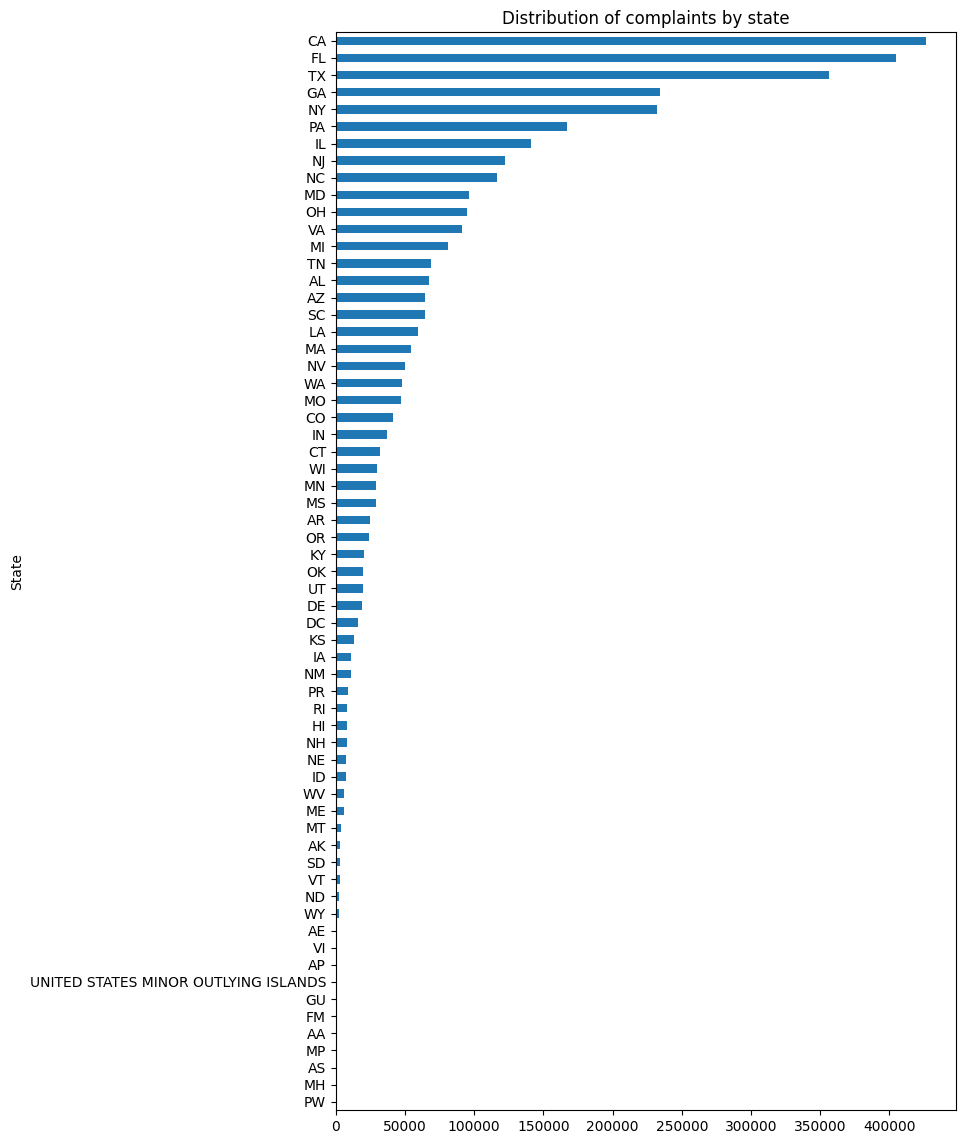

In [14]:
# Show the distribution of complaints by state 
plt.figure(figsize=(8, 14))  # Adjust the width and height as needed
df['State'].value_counts().sort_values(ascending=True).plot.barh(title='Distribution of complaints by state')
plt.show()

California has the highest number of complaints followed by Florida then Texas. 

<Axes: title={'center': 'Complaints by product type'}, ylabel='Sub-product'>

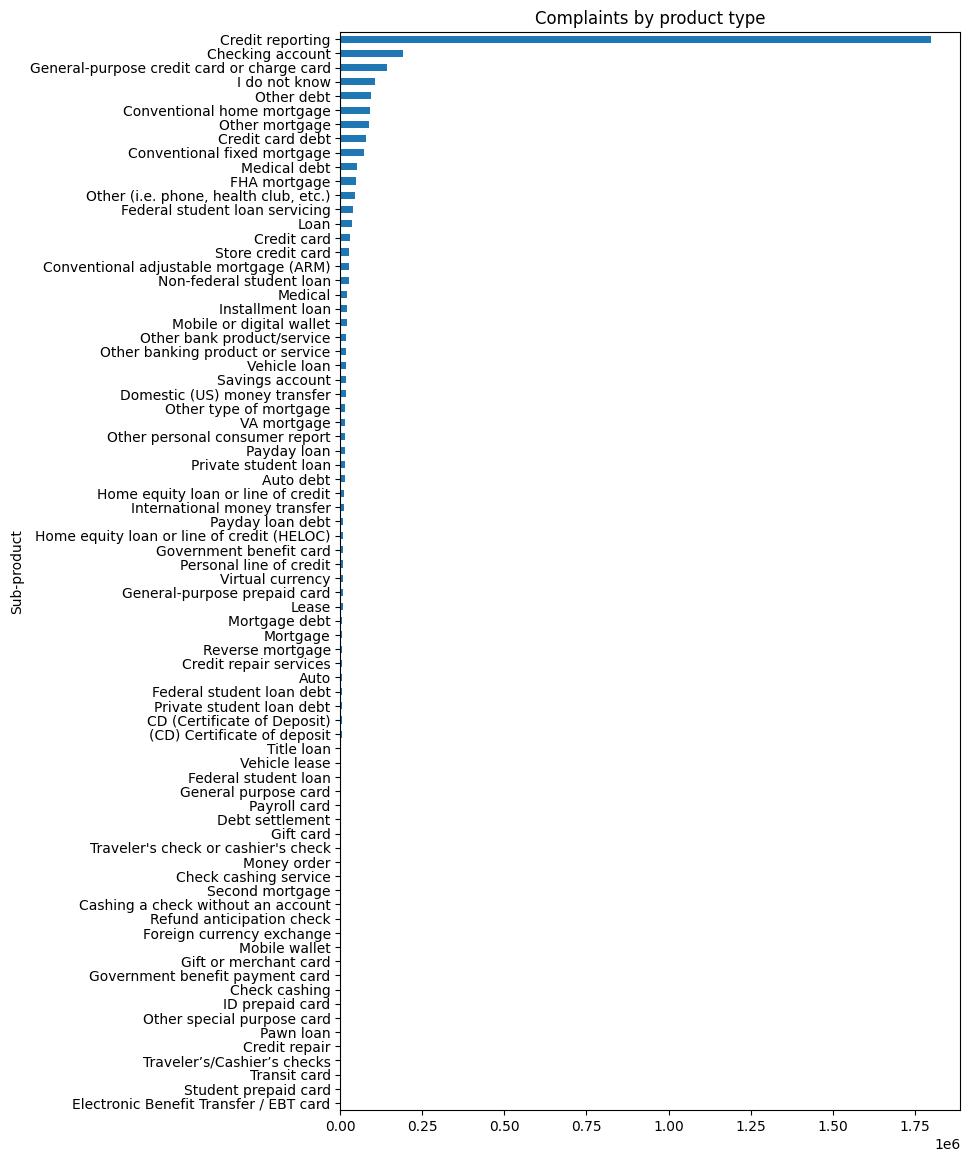

In [15]:
# Complaints by product type
plt.figure(figsize=(8, 14))  
df['Sub-product'].value_counts().sort_values(ascending=True).plot.barh(title='Complaints by product type') 

<Axes: title={'center': 'Timely response Yes or No'}, ylabel='Timely response?'>

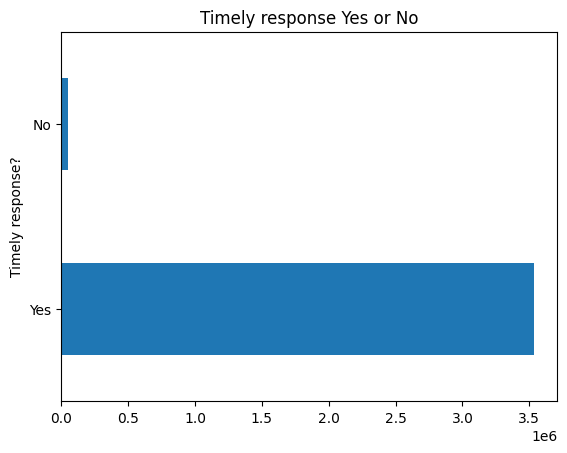

In [16]:
# Distribution of timely response 
df['Timely response?'].value_counts().plot.barh(title='Timely response Yes or No')

<Axes: title={'center': 'Product Distribution'}, ylabel='Product'>

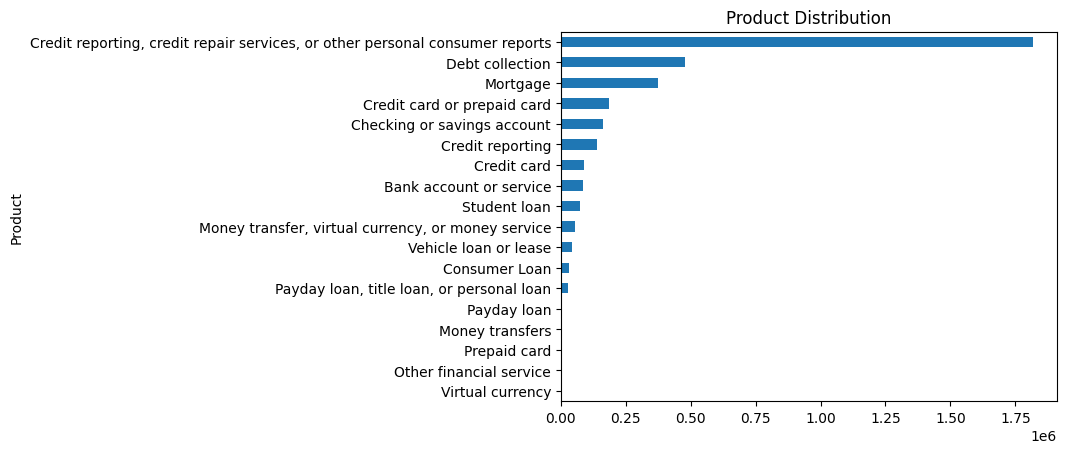

In [17]:
# Complaint distribution of whole dataset by product 
df['Product'].value_counts().sort_values(ascending=True).plot.barh(title='Product Distribution') 

In the figure above we see Credit reporting, credit repair services, or other personal consumer reports has the highest complaints. 

<Axes: title={'center': 'Product Distribution of non-Timely Response'}, ylabel='Product'>

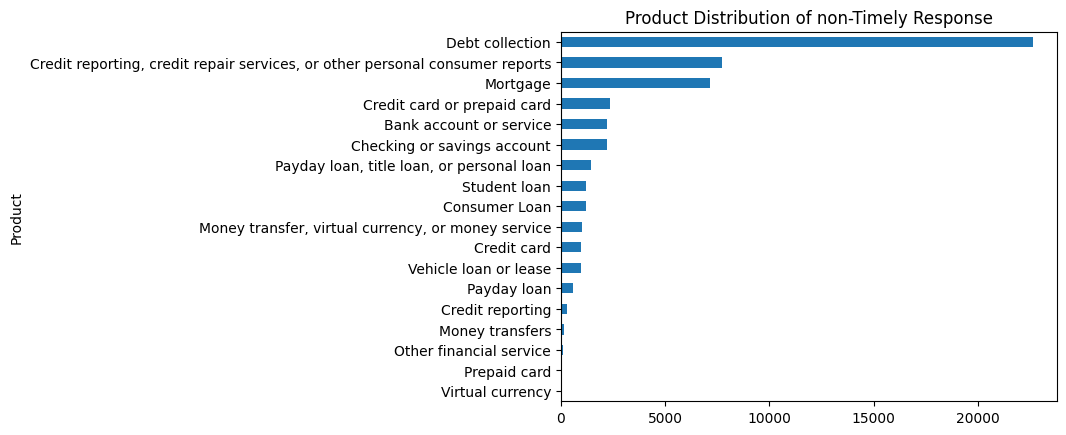

In [18]:
# Complaint distribution of only Timely Response=NO 
df[df['Timely response?'] == 'No']['Product'].value_counts().sort_values().plot.barh(title='Product Distribution of non-Timely Response')


Out of all the Product Distribution with non-timely responces we observe Debt collection has the highest number of complaints.

<Axes: title={'center': 'Product Distribution of Timely Response'}, ylabel='Product'>

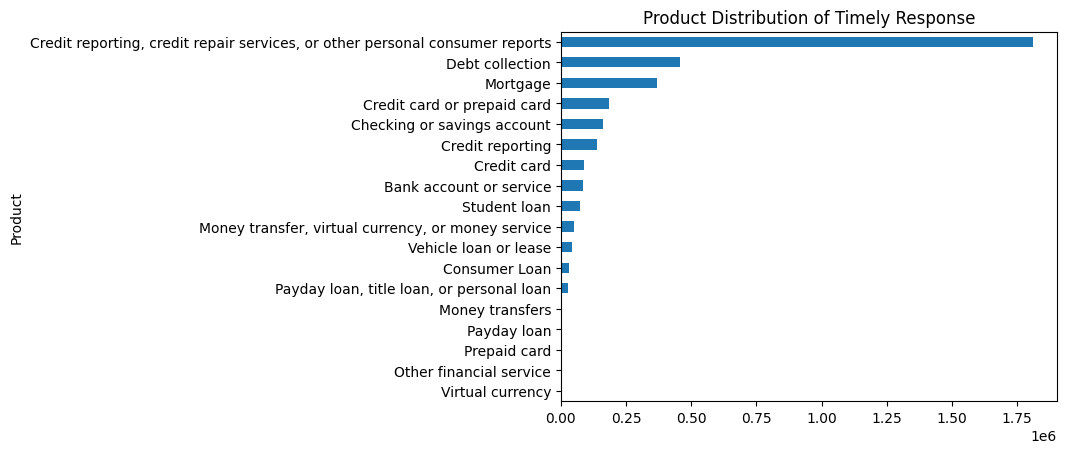

In [19]:
# Complaint distribution of only Timely Response=YES  
df[df['Timely response?'] == 'Yes']['Product'].value_counts().sort_values().plot.barh(title='Product Distribution of Timely Response')


Out of all the Product Distribution with Timely responces we observe Credit reporting, credit repair services or other personal consumer reports has the highest complaints. 

SUB - PRODUCT ANALYSIS 

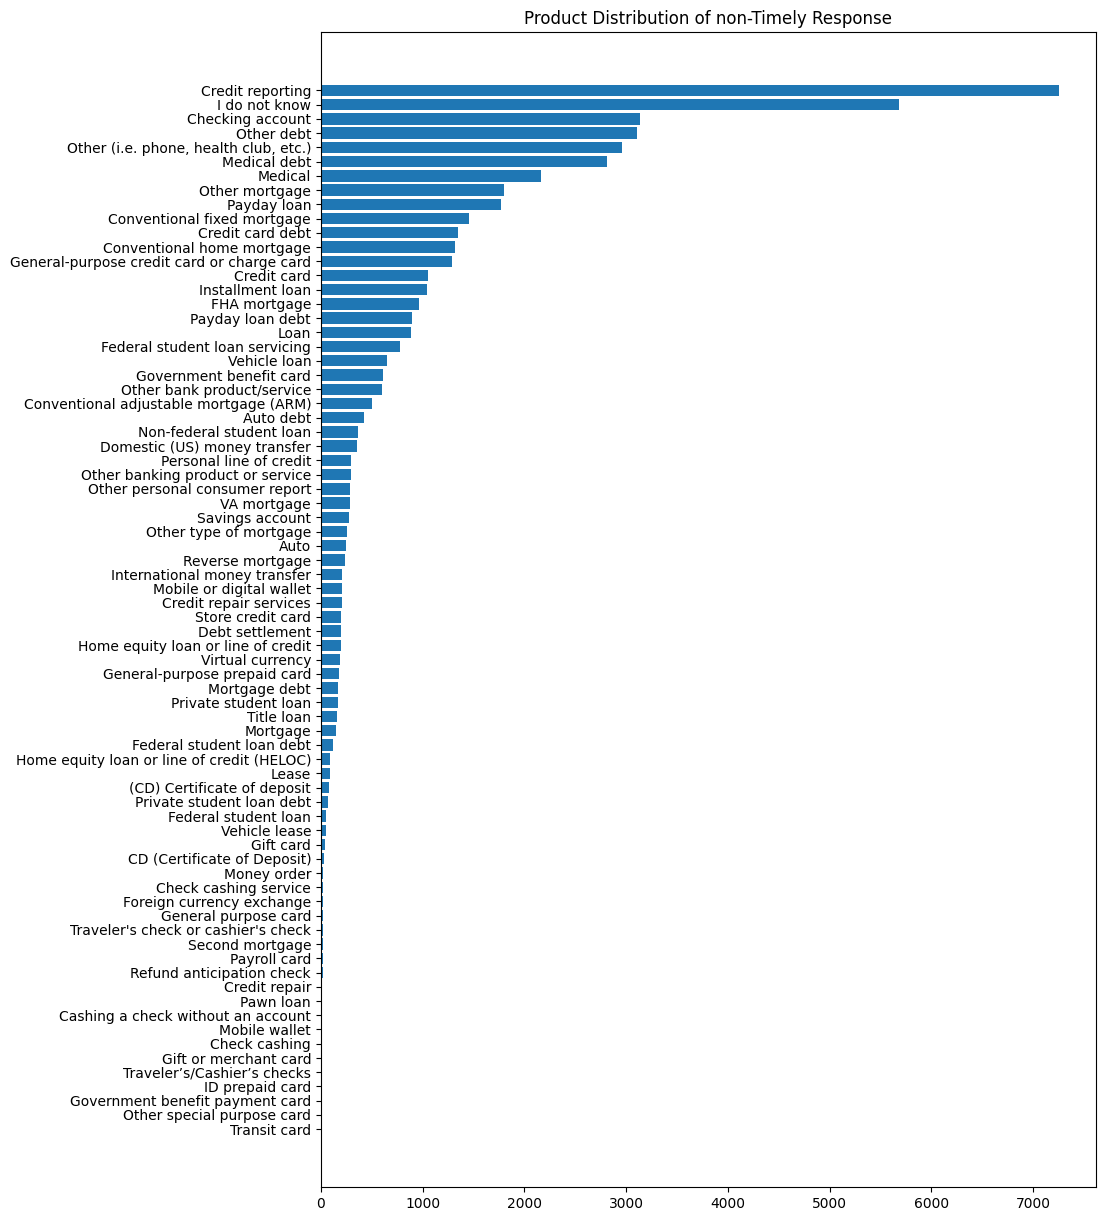

In [20]:
# Complaint distribution of only Timely Response = NO 
non_timely_response_df = df[df['Timely response?'] == 'No']

# Count the occurrences of each 'Sub-product' and sort values
sub_product_counts = non_timely_response_df['Sub-product'].value_counts().sort_values()

# Specify the figure size (width, height) in inches
fig = plt.figure(figsize=(10, 15))

# Plot the horizontal bar chart
plt.barh(sub_product_counts.index, sub_product_counts.values)
plt.title('Product Distribution of non-Timely Response')

plt.show()

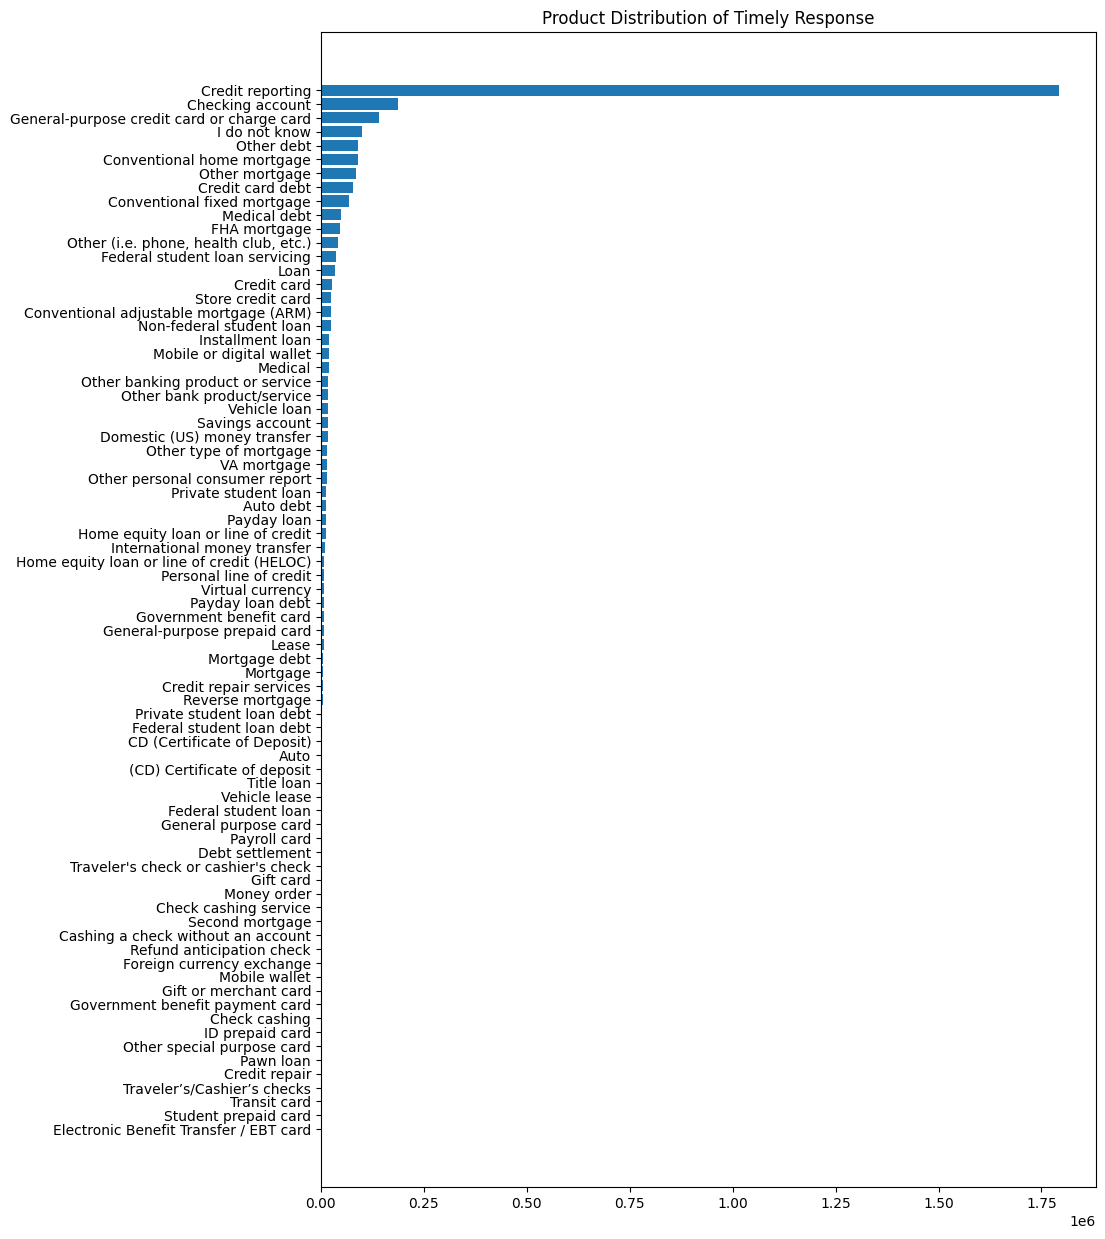

In [21]:
# Complaint distribution of only Timely Response = NO 
timely_response_df = df[df['Timely response?'] == 'Yes']

# Count the occurrences of each 'Sub-product' and sort values
sub_product_counts = timely_response_df['Sub-product'].value_counts().sort_values()

# Specify the figure size (width, height) in inches
fig = plt.figure(figsize=(10, 15))

# Plot the horizontal bar chart
plt.barh(sub_product_counts.index, sub_product_counts.values)
plt.title('Product Distribution of Timely Response')

plt.show()


ISSUE ANALYSIS

<Axes: title={'center': 'Issue Distribution'}, ylabel='Issue'>

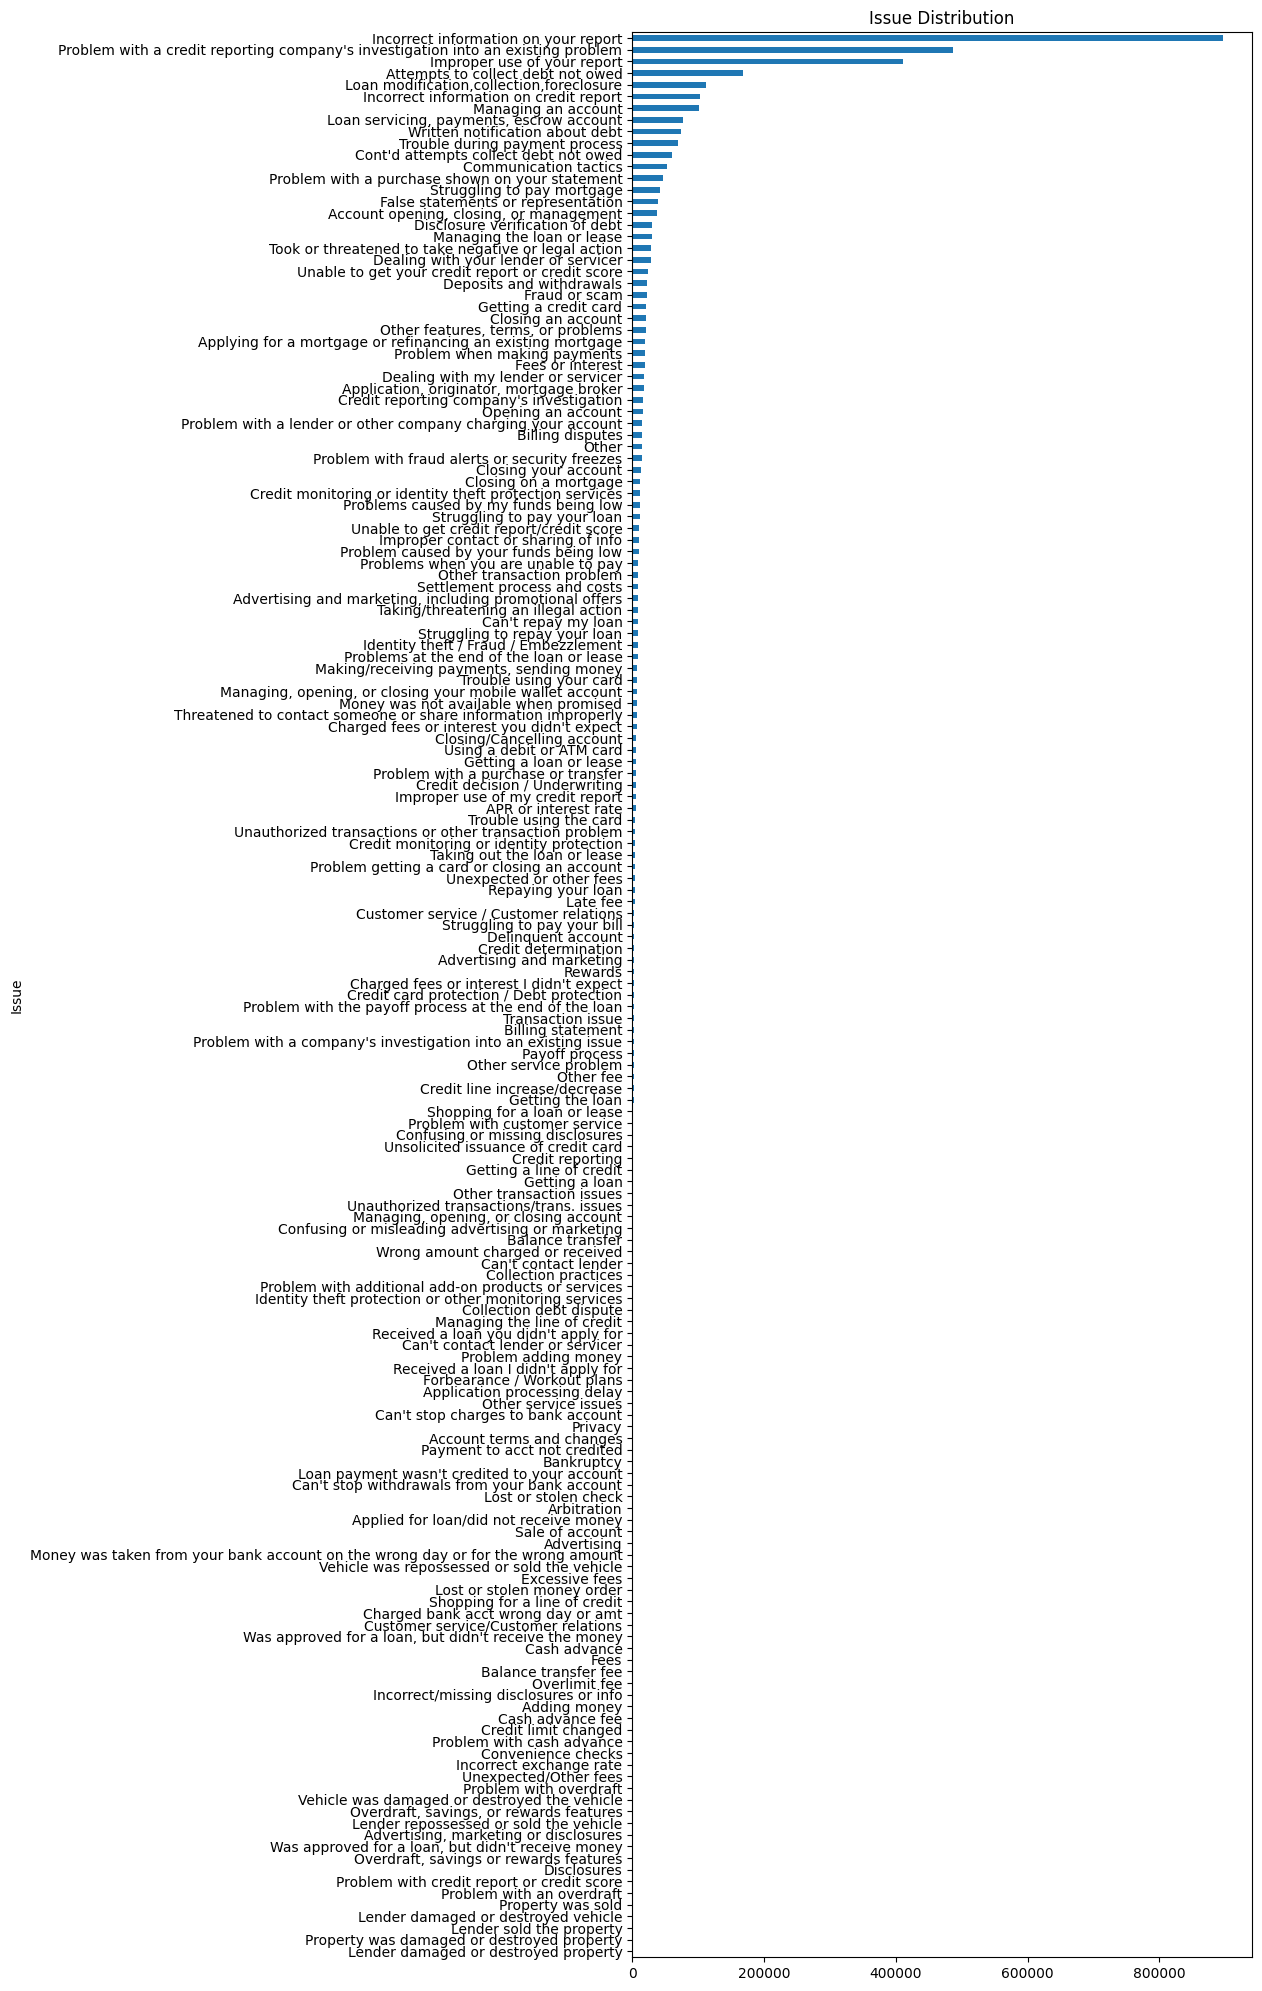

In [22]:
# Distribution of Issues in the whole dataset 
plt.figure(figsize=(8, 25))
df['Issue'].value_counts().sort_values(ascending=True).plot.barh(title='Issue Distribution') 

<Axes: title={'center': 'Issue Distribution of non-Timely Response'}, ylabel='Issue'>

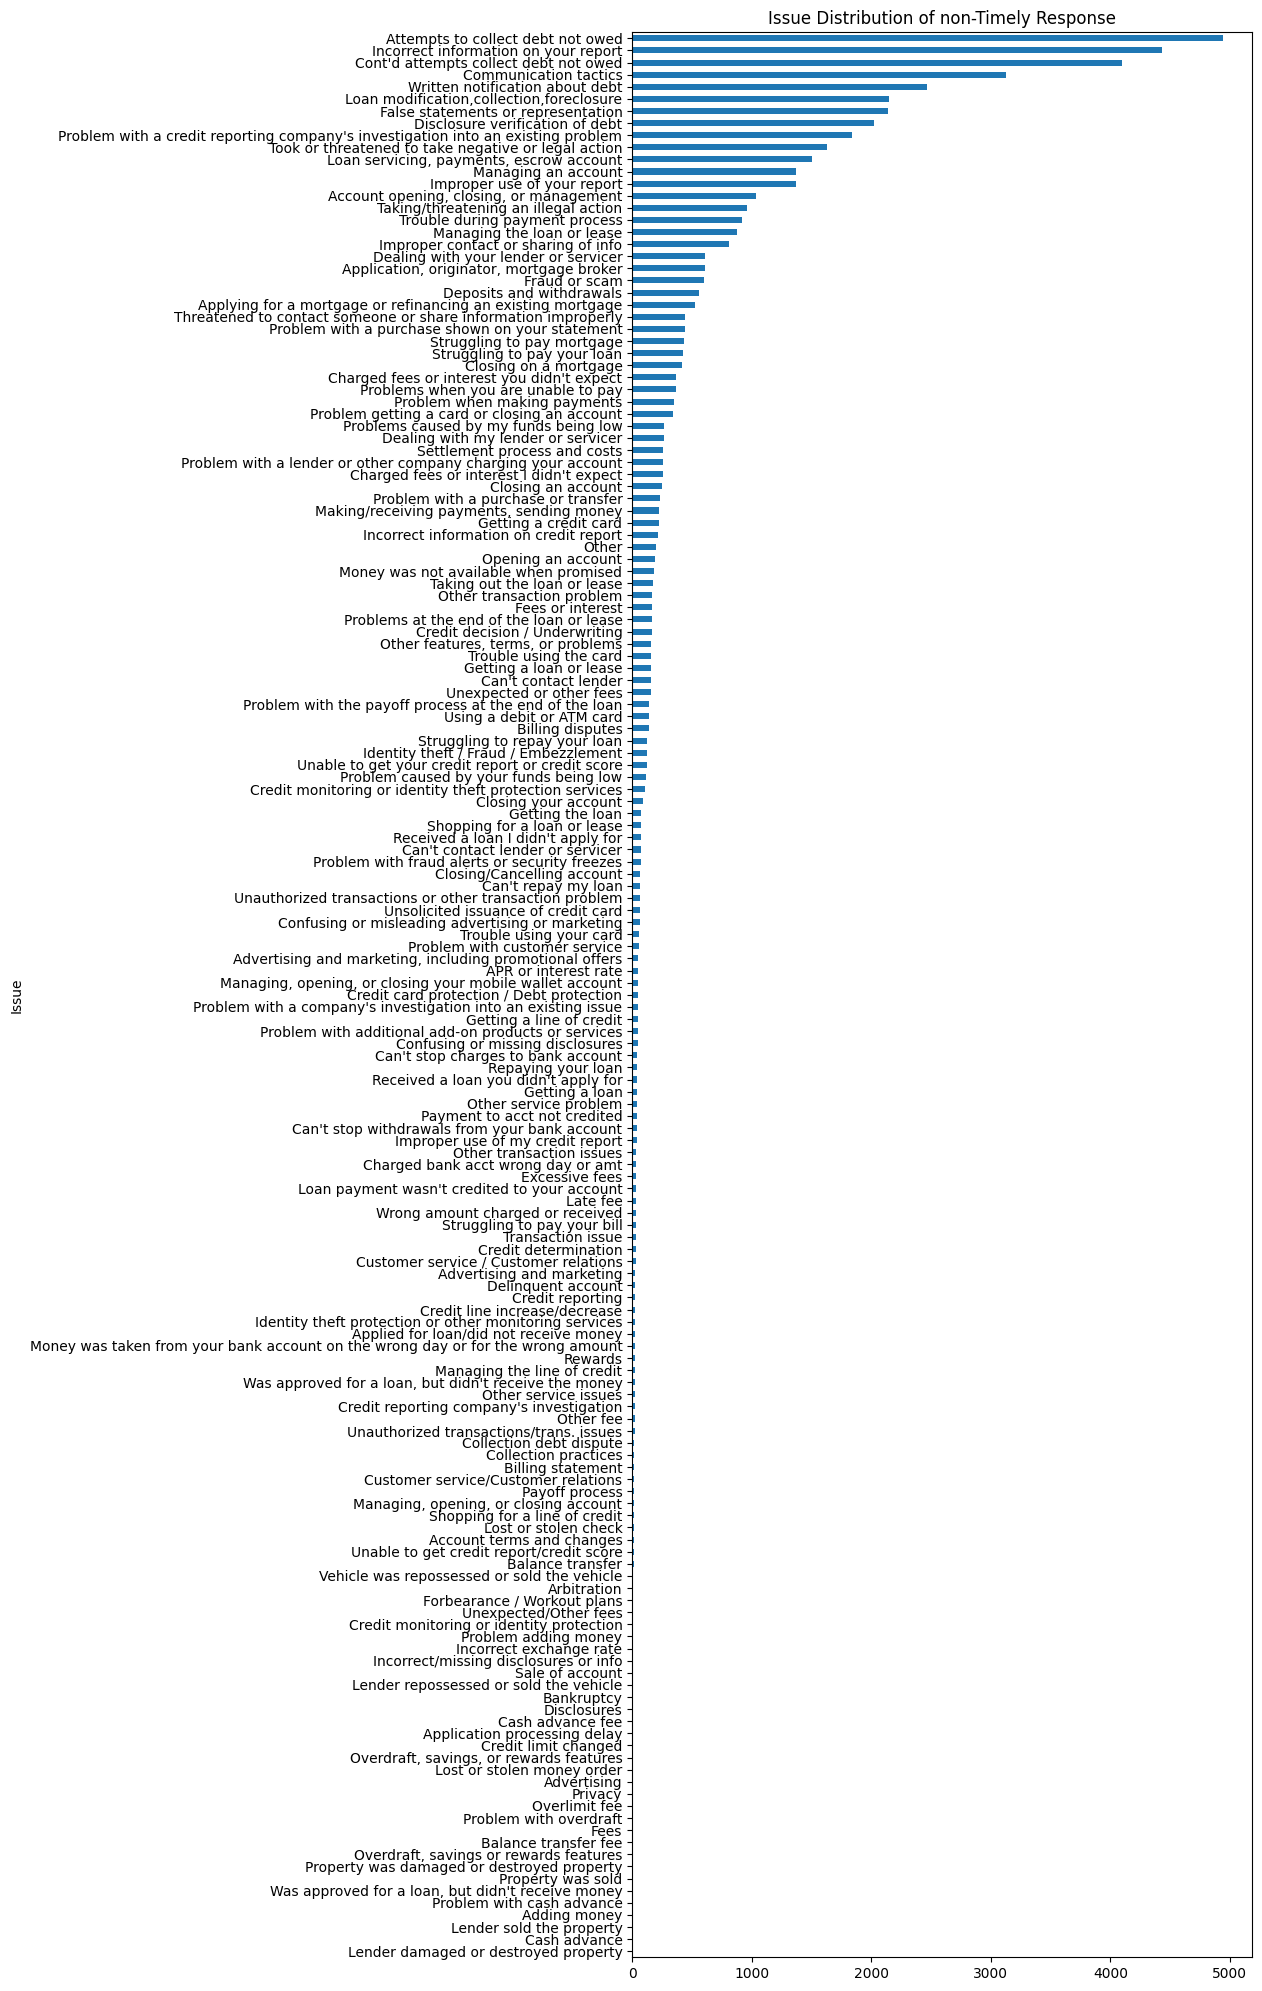

In [23]:
# Distribution of Issues in the non-timely dataset 
plt.figure(figsize=(8, 25))
df[df['Timely response?'] == 'No']['Issue'].value_counts().sort_values().plot.barh(title='Issue Distribution of non-Timely Response')

COMPANY ANALYSIS

<Axes: title={'center': 'Companies'}, ylabel='Company'>

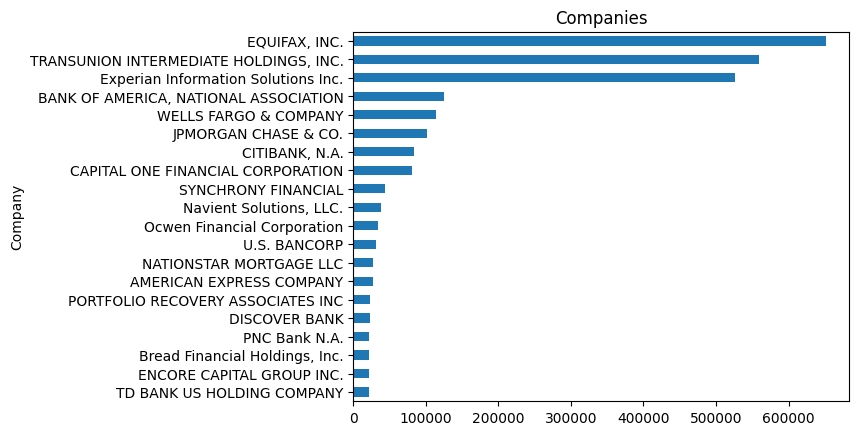

In [24]:
# Distribution of Companies in the whole dataset 
df['Company'].value_counts().sort_values(ascending=True).tail(20).plot.barh(title='Companies') 

<Axes: title={'center': 'Company Distribution in non-Timely Response'}, ylabel='Company'>

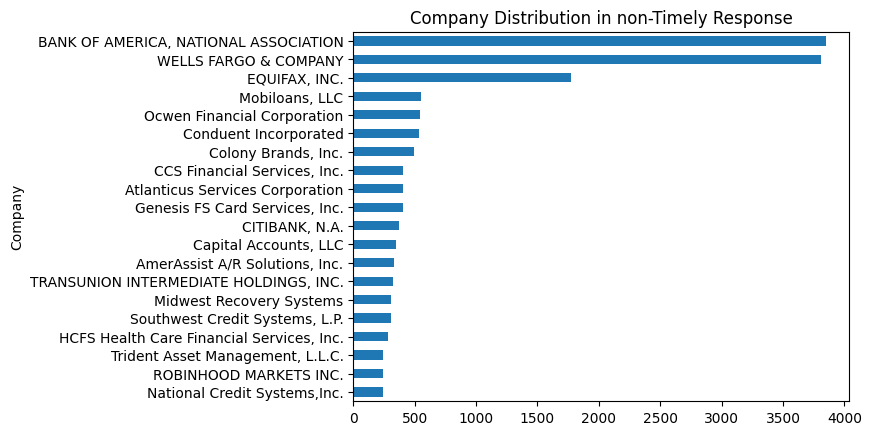

In [27]:
df[df['Timely response?'] == 'No']['Company'].value_counts().sort_values().tail(20).plot.barh(title='Company Distribution in non-Timely Response')

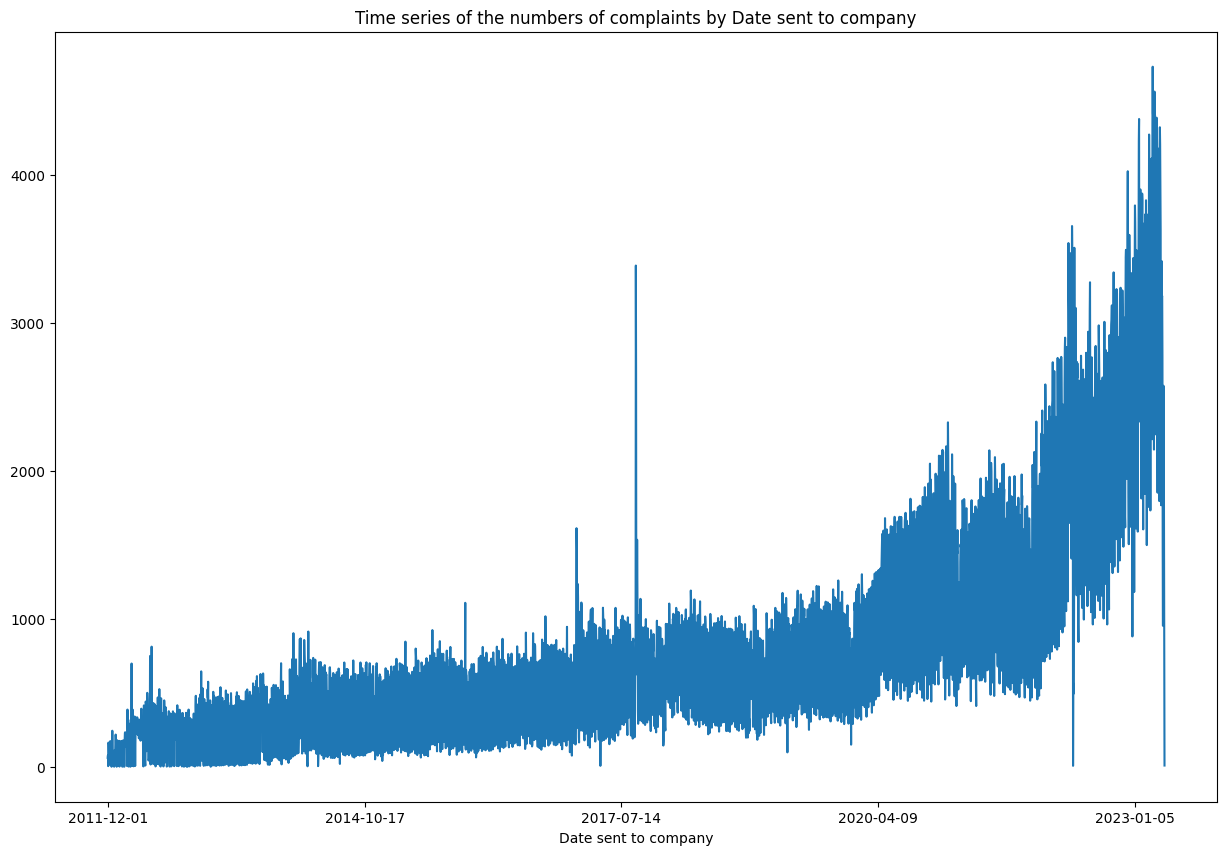

In [33]:
plt.figure(figsize=(15,10))
df.groupby('Date sent to company')['Date sent to company'].count().plot(title='Time series of the numbers of complaints by Date sent to company');

We observe that the total number of cases being opened are increasing as time goes by which could be indicative of both growing customer base and increase in complaints.

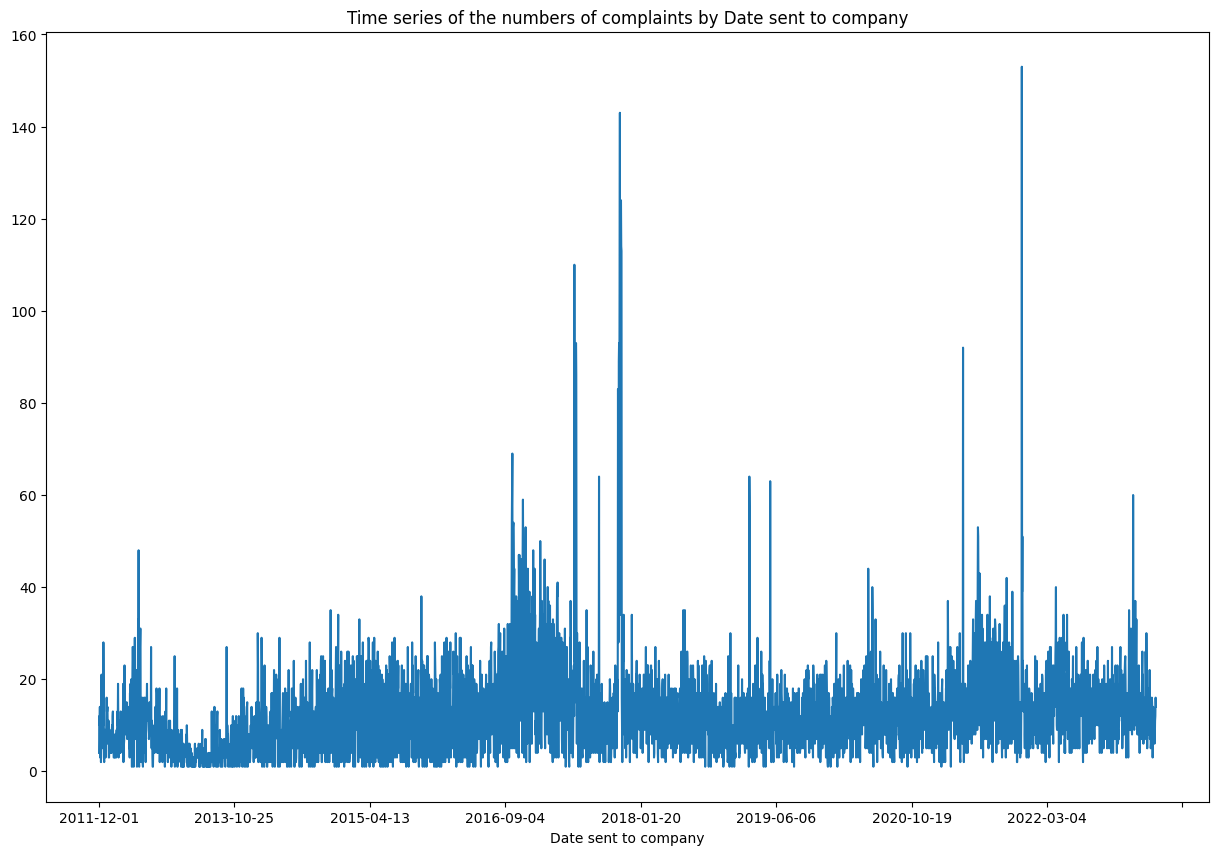

In [32]:
plt.figure(figsize=(15,10))
non_timely_response_df.groupby('Date sent to company')['Date sent to company'].count().plot(title='Time series of the non-timely complaints by Date sent to company');

We notice between late 2016 and early 2018 there is a spike in complaints with a non-timely response

INSIGHTS

1. From the diagran above we can see that most cases were closed with an explanation. This is a sign that the company is actively looking at the cases being opened and providing feedback while closing them. 

2. The ratio of closed with non-monetary/monetary relief is healthy which means that most cases are closed with no payment from the company leading to more revenue. 

3. The ratio of late respenses is low, which means that most cases are closed on time. 

4. Credit reporting, credit repair services, or other personal consumer reports has the highest complaints. 

5. Debt collection has the highest complaints.

6. Credit reporting, credit repair services, or other personal consumer reports has the highest complaints. 

7. The most occouring for the total report had an issue of " Incorrect informatino on your report" 

8. The most occouring for Not timely report had an issue of " Incorrect informatino on your report" 

9. For all reports Equifax has the highest number of reports, followed by Transunion.

10. For Not Timely reports Bank of America has the highest number of reports followed by Wells Fargo. 

11. California has the highest number of complaints followed by Florida then Texas. 
